In [199]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn import metrics
import statsmodels.api as sm

In [197]:
from sklearn import datasets
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

In [27]:
Diab= load_diabetes()

In [39]:
print(Diab.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [41]:
Diab.keys() # Entries or labelled or Dependent variables

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [43]:
Diab.feature_names #Column names or features 

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

Converting the data into a pandas DataFrame

In [47]:
Diabetes_DataFrame=pd.DataFrame(Diab.data, columns=Diab.feature_names)

In [134]:
Diabetes_DataFrame

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progress
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [136]:
Diabetes_DataFrame.info() # To get insight for the structure of the out dataframe #

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       442 non-null    float64
 1   sex       442 non-null    float64
 2   bmi       442 non-null    float64
 3   bp        442 non-null    float64
 4   s1        442 non-null    float64
 5   s2        442 non-null    float64
 6   s3        442 non-null    float64
 7   s4        442 non-null    float64
 8   s5        442 non-null    float64
 9   s6        442 non-null    float64
 10  progress  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [ ]:
# from the above info of the dataframe, we can draw out the below insights
# we have 10 numeric features and no null values

In [55]:
Diabetes_DataFrame['progress']=Diab.target # converts target variable to progress

In [57]:
Diabetes_DataFrame.to_csv('diabetes.csv') #converts the Diabetes_DataFrame to csv format

In [62]:
Diabetes_DataFrame=pd.read_csv('diabetes.csv')

In [64]:
Diabetes_DataFrame.head() # select the top 5 rows of the Dataframe

,Unnamed: 0,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progress
0,0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [114]:
del Diabetes_DataFrame['Unnamed: 0'] # Removing the Unnamed:0 column

In [116]:
Diabetes_DataFrame.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progress
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [118]:
Diabetes_DataFrame.describe() 

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progress
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-7.284269e-18,2.348549e-17,-2.087320e-16,-4.571507e-17,-9.293722e-18,4.420798e-17,2.135044e-18,2.913707e-17,9.143013e-17,1.431736e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [122]:
Diabetes_DataFrame[['age','sex','bmi','bp','progress']].describe()

,age,sex,bmi,bp,progress
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-7.284269e-18,2.348549e-17,-2.087320e-16,-4.571507e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,346.000000


In [124]:
Diabetes_DataFrame[['s1','s2','s3','s4','s5','s6']].describe()

,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-9.293722e-18,4.420798e-17,2.135044e-18,2.913707e-17,9.143013e-17,1.431736e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


correlation Coefficient 

In [160]:
import seaborn as sns
import matplotlib.pyplot as plt

(11.5, -0.5)

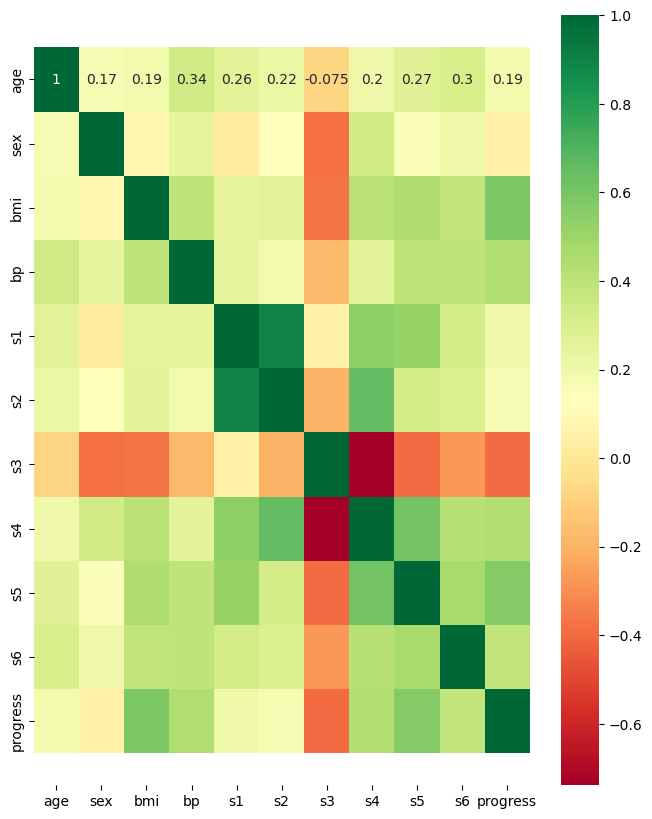

In [225]:
plt.figure(figsize=(8,10))
ax=sns.heatmap(Diabetes_DataFrame.corr(),annot=True, cmap='RdYlGn')
bottom,top=ax.get_ylim()
ax.set_ylim(bottom + 0.5,top - 0.5)

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1200x1000 with 0 Axes>

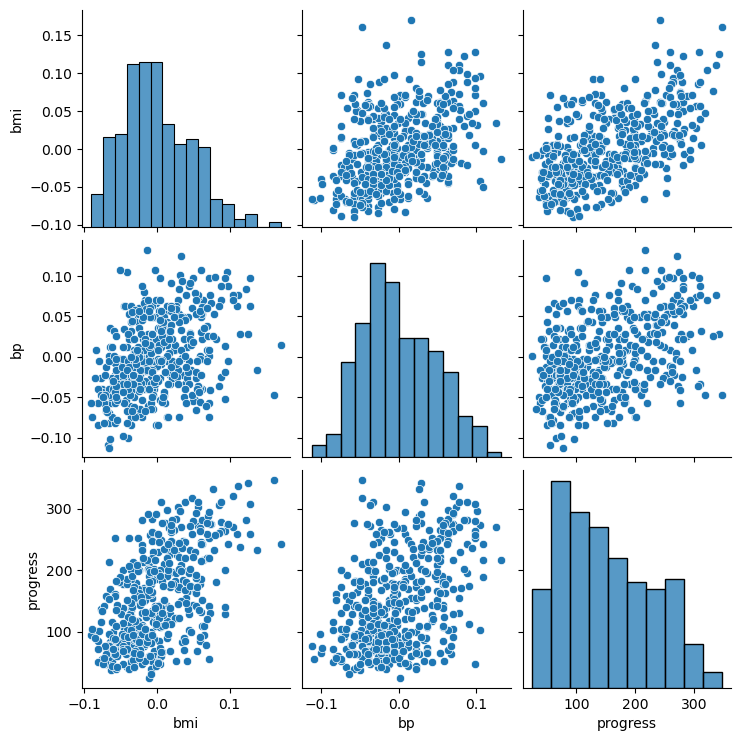

In [164]:
plt.figure(figsize=(12, 10))
sns.pairplot(Diabetes_DataFrame[['bmi','bp','progress']])

<Figure size 800x600 with 0 Axes>

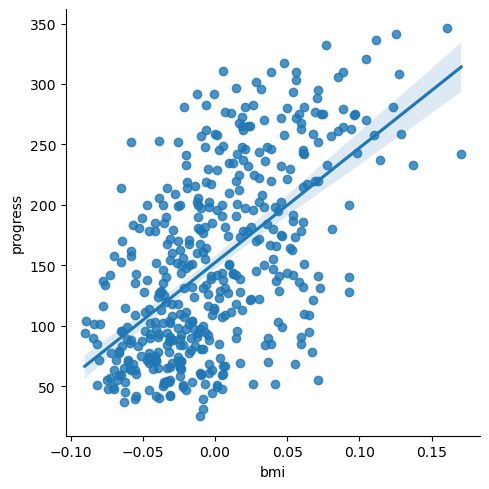

In [166]:
# plotting Linear Regression plot
plt.figure(figsize=(8, 6))
sns.lmplot(x='bmi',y='progress', data=Diabetes_DataFrame)
plt.show()

<Figure size 800x600 with 0 Axes>

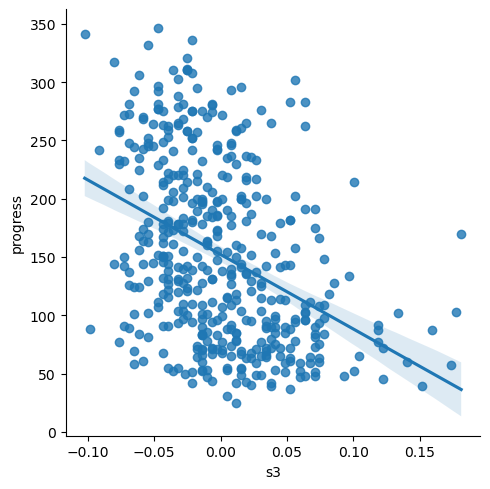

In [168]:
plt.figure(figsize=(8, 6))
sns.lmplot(x='s3',y='progress', data=Diabetes_DataFrame)
plt.show()

<Figure size 800x600 with 0 Axes>

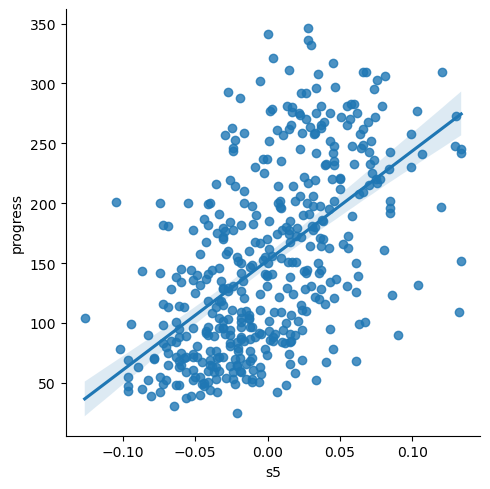

In [170]:
plt.figure(figsize=(8, 6))
sns.lmplot(x='s5',y='progress', data=Diabetes_DataFrame)
plt.show()

x: Independent variable
y: Dependent variable


In [205]:
x=Diabetes_DataFrame.iloc[:, -1] #features
y=Diabetes_DataFrame.iloc[:,  -1] # Target

#Using Stasmodels: Ordinary least Square(OLS)

In [209]:
x=sm.add_constant(x) #adding intercept to the model
sm_model=sm.OLS(y, x).fit() # Generating a model for OLS
prediction=sm_model.predict(x) #result for x prediction
sm_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               progress   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.568e+37
Date:                Sun, 26 May 2024   Prob (F-statistic):               0.00
Time:                        21:38:01   Log-Likelihood:                 15272.
No. Observations:                 442   AIC:                        -3.054e+04
Df Residuals:                     440   BIC:                        -3.053e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.553e-15   2.52e-17   -140.828      0.000    -3.6e-15    -3.5e-15
progress       1.0000   1.48e-19   6.76e+18      0.000       1.000       1.000
==============================================================================
Omnibus:                      908.891   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           875343.832
Skew:                          14.765   Prob(JB):                         0.00
Kurtosis:                     219.005   Cond. No.                         378.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

REGRESSION EVALUATION METRICES

1. Mean Absolute Error(MAE)
2. Mean Squared Error(MSE)
3. Root Mean Squared Error(RMSE)

In [207]:
MAE=round(metrics.mean_absolute_error(y, prediction), 2)
MSE=round(metrics.mean_squared_error(y, prediction), 2)
RMSE=round(np.sqrt(metrics.mean_squared_error(y, prediction)),2)

In [217]:
print(MAE)
print(MSE)
print(RMSE)

43.28
2859.7
53.48


In [219]:
print('Parameters:', sm_model.params)
print()
print('R2: ', sm_model.rsquared)

Parameters: const      -3.552714e-15
progress    1.000000e+00
dtype: float64

R2:  1.0


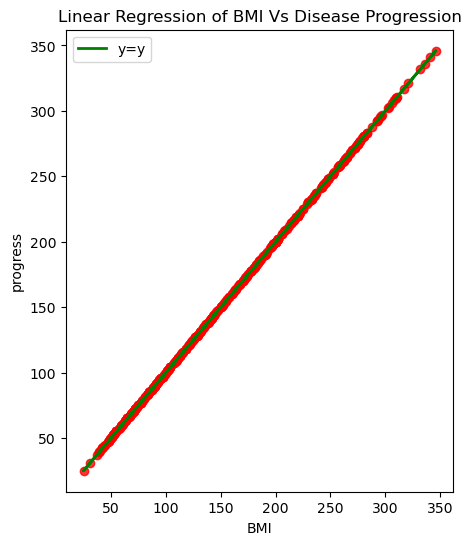

In [246]:
plt.figure(figsize=(5,6))
plt.scatter(y, prediction, color='r', alpha=0.8)
plt.plot(y, y, color='g', linewidth=2, label='y=y')
plt.title('Linear Regression of BMI Vs Disease Progression')
plt.xlabel('BMI')
plt.ylabel('progress')
plt.legend()
plt.show()


There is a Direct correlation between the Body mass index and the Diesease progression every year